# House Prices: Advanced Regression Techniques

## V1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [6]:
df.shape

(1460, 81)

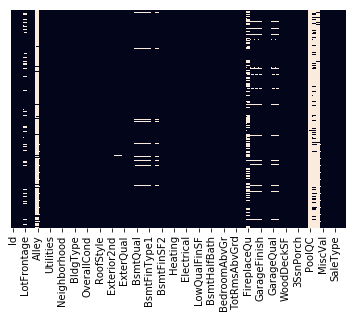

In [7]:
#white parts are null values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [ ]:
df

In [18]:
for column in df.columns:
    if round(df[column].isnull().sum()/df.shape[0]*100,3)>50:
        print(column,round(df[column].isnull().sum()/df.shape[0]*100,3),'%')

Alley 93.767 %
PoolQC 99.521 %
Fence 80.753 %
MiscFeature 96.301 %


In [19]:
# Null ratio is high so we drop these columns and also Id
df.drop(df[['Alley','PoolQC','Fence','MiscFeature','Id']],axis=1,inplace=True)

In [20]:
#Filling the Nan values with means and mode according to their column type
columnNames=df.columns.values
columndTypes=df.dtypes
for i in range(0,len(columnNames)):
    if columndTypes[i]=='int64' or columndTypes[i]=='float64':
        df[[columnNames[i]]]=df[[columnNames[i]]].fillna(df[[columnNames[i]]].mean())
    elif columndTypes[i]=='O':
        df[[columnNames[i]]]=df[[columnNames[i]]].fillna(df[[columnNames[i]]].mode().iloc[0][0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

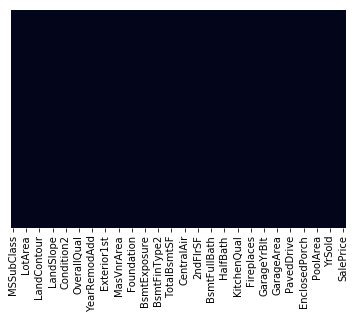

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [35]:
df_rows,df_columns=df.shape
df.shape

(1460, 76)

## Dummy Convert

In [23]:
df_copy=df.drop(df[['SalePrice']],axis=1)

In [ ]:
### Run "Test_Adv_Regr_HP

In [24]:
#Concatenate converted test date with df_copy because test data may have diffent categorical value than train data has
df_cTest=pd.read_csv('convertedTest.csv')
dfConcat=pd.concat([df_copy,df_cTest],sort=False)

In [29]:
#get Object type columns
oColumns=[]
copyTypes=dfConcat.dtypes
for i in range(0,len(dfConcat.columns)):
    if copyTypes[i]=='O':
        oColumns.append(dfConcat.columns[i])
## OR
#oColumns=[feature for feature in dfConcat.columns if dfConcat[feature].dtypes=='O']

In [30]:
oOColumns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [31]:
for i in range(0,len(oColumns)):
    dummy=pd.get_dummies(dfConcat[oColumns[i]])
    dfConcat=pd.concat([dfConcat,dummy],axis=1)
    del dummy
    dfConcat.drop(oColumns[i],axis=1,inplace=True)

In [32]:
dfConcat=dfConcat.loc[:,~dfConcat.columns.duplicated()]

In [33]:
dfConcat.shape

(2919, 203)

In [36]:
df_train=dfConcat.iloc[0:df_rows]
df_test=dfConcat.iloc[df_rows:dfConcat.shape[0]]

In [38]:
X_train=df_train
y_train=df[['SalePrice']]
y_test=df_test

In [39]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
#save model 
#import pickle
#modelname='priceModel.pkl'
#pickle.dump(classifier,open(modelname,'wb'))

In [40]:
#prediction
y_hat=classifier.predict(df_test)

In [41]:
y_hat

array([124695.234, 164163.86 , 184720.23 , ..., 178534.73 , 107671.96 ,
       218593.16 ], dtype=float32)

In [25]:
# convert y_hat to csv
submission=pd.read_csv('sample_submission.csv')
submission.drop(submission[['SalePrice']],axis=1,inplace=True)
submission['SalePrice']=y_hat
submission.to_csv('submissionV1.csv',index=False)

## Score 0.14648

# V2

In [42]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [43]:
#Optimizing hyperparameters
booster=['gbtree','gblinear']
base_score=[0.25, 0.5, 0.75, 1]
n_estimators=[100, 500, 900, 1100, 1500]
max_depth=[2, 3, 5, 10, 15]
learning_rate=[0.05, 0.1, 0.15, 0.20, 0.25]
min_child_weight=[1, 2, 3, 4, 5]

params={
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
}

In [29]:
classifierV2=xgboost.XGBRegressor()

In [32]:
random_search = RandomizedSearchCV(classifierV2, param_distributions=params, n_iter=50, scoring='neg_mean_absolute_error', n_jobs=4, cv=5, verbose=5, random_state=42)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   53.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 17.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 29.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [33]:
print('\n Best estimator:')
print(random_search.best_estimator_)


 Best estimator:
XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


###### best parameters
base_score = 0.75, 
booster = 'gbtree', 
learning_rate = 0.05, 
max_depth = 5, 
min_child_weight = 2, 
n_estimators = 500 

In [38]:
classifierV2=xgboost.XGBRegressor(base_score = 0.75, booster = 'gbtree', learning_rate = 0.05, max_depth = 5, min_child_weight = 2, n_estimators = 500)

In [39]:
classifierV2.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [41]:
#import pickle
#modelname='priceModelV2.pkl'
#pickle.dump(classifierV2,open(modelname,'wb'))

In [42]:
y_hatV2=classifierV2.predict(df_test)
y_hatV2

array([120829.88, 151522.27, 184790.17, ..., 168425.27, 116019.49,
       228261.92], dtype=float32)

In [43]:
submissionV2=pd.read_csv('sample_submission.csv')
submissionV2.drop(submissionV2[['SalePrice']],axis=1,inplace=True)
submissionV2['SalePrice']=y_hatV2
submissionV2.to_csv('submissionV3.csv',index=False)

## V2 Score 0.138123

## V3

##### Run "Feature EngineeringTest.py" before V3

In [2]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import xgboost

In [39]:
pd.pandas.set_option('display.max_columns', None)

In [73]:
dataset=pd.read_csv('dataTrain.csv')
dataTest=pd.read_csv('dataTest.csv')

In [41]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,BsmtFullBathnan,BsmtHalfBathnan,SalePrice
0,1,0.235294,0.75,0.418208,0.366344,1.0,0.5,0.666667,0.333333,0.0,0.50,0.5,0.375000,0.500,0.714286,0.5,0.285714,0.666667,0.500,0.043796,0.112903,0.6,0.571429,0.357143,0.400000,0.25,0.12250,1.000000,0.5,0.0,0.75,1.00,0.00,0.500000,0.125089,0.666667,0.0,0.064212,0.140098,0.2,0.50,1.0,1.0,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,1.000000,0.461538,0.666667,0.00,0.8,0.666667,0.652866,1.000000,0.4,0.368280,0.6,0.6,0.5,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,0.090909,0.50,0.75,0.6,0.0,0.0,0.0,0.0,0.0,12.247694
1,2,0.000000,0.75,0.495064,0.391317,1.0,0.5,0.666667,0.333333,0.0,0.75,0.5,0.125000,0.875,0.714286,0.5,0.571429,0.555556,0.875,0.233577,0.532258,0.6,0.571429,0.642857,0.533333,0.50,0.00000,0.666667,0.5,0.2,0.75,1.00,0.25,0.166667,0.173281,0.666667,0.0,0.121575,0.206547,0.2,0.50,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.666667,0.307692,0.666667,0.25,0.6,0.666667,0.735669,1.000000,0.4,0.309140,0.6,0.6,0.5,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,0.363636,0.25,0.75,0.6,0.0,0.0,0.0,0.0,0.0,12.109011
2,3,0.235294,0.75,0.434909,0.422359,1.0,0.5,0.333333,0.333333,0.0,0.50,0.5,0.375000,0.500,0.714286,0.5,0.285714,0.666667,0.500,0.058394,0.129032,0.6,0.571429,0.357143,0.400000,0.25,0.10125,1.000000,0.5,0.0,0.75,1.00,1.00,0.500000,0.086109,0.666667,0.0,0.185788,0.150573,0.2,0.50,1.0,1.0,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,1.000000,0.307692,0.666667,0.25,0.6,0.666667,0.659236,1.000000,0.4,0.408602,0.6,0.6,0.5,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,0.727273,0.50,0.75,0.6,0.0,0.0,0.0,0.0,0.0,12.317167
3,4,0.294118,0.75,0.388581,0.390295,1.0,0.5,0.333333,0.333333,0.0,0.00,0.5,0.875000,0.500,0.714286,0.5,0.285714,0.666667,0.500,0.671533,0.612903,0.6,0.571429,0.142857,0.466667,0.50,0.00000,0.666667,0.5,0.4,1.00,0.75,0.00,0.166667,0.038271,0.666667,0.0,0.231164,0.123732,0.2,0.25,1.0,1.0,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,1.000000,0.384615,0.666667,0.25,1.0,0.833333,0.662420,0.333333,0.6,0.431452,0.6,0.6,0.5,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,0.090909,0.00,0.75,0.8,0.0,0.0,0.0,0.0,0.0,11.849398
4,5,0.235294,0.75,0.513123,0.468761,1.0,0.5,0.333333,0.333333,0.0,0.75,0.5,0.916667,0.500,0.714286,0.5,0.285714,0.777778,0.500,0.065693,0.161290,0.6,0.571429,0.357143,0.400000,0.25,0.21875,1.000000,0.5,0.0,0.75,1.00,0.75,0.500000,0.116052,0.666667,0.0,0.209760,0.187398,0.2,0.50,1.0,1.0,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,1.000000,0.538462,0.666667,0.25,0.6,0.666667,0.662420,1.000000,0.6,0.561828,0.6,0.6,0.5,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,1.000000,0.50,0.75,0.6,0.0,0.0,0.0,0.0,0.0,12.429216


In [ ]:
np.exp(saleprice)

In [74]:
y_trainV3=dataset[['SalePrice']]
X_trainV3=dataset.drop(['Id','SalePrice'],axis=1)

In [68]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_trainV3, y_trainV3)

c:\users\batman\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265944231.470459, tolerance: 920791133.4609977
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [69]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False])

In [71]:
selected_feat = X_trainV3.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_trainV3.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 84
selected features: 79
features with coefficients shrank to zero: 5


In [72]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [75]:
X_trainV3=X_trainV3[selected_feat]

In [76]:
X_trainV3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.418208,0.366344,1.0,0.5,0.666667,0.333333,0.0,0.50,0.5,0.375000,0.500,0.714286,0.5,0.285714,0.666667,0.500,0.043796,0.112903,0.6,0.571429,0.357143,0.400000,0.25,0.12250,1.000000,0.5,0.0,0.75,1.00,0.00,0.500000,0.125089,0.666667,0.0,0.064212,0.140098,0.2,0.50,1.0,1.0,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,1.000000,0.461538,0.666667,0.00,0.8,0.666667,0.652866,1.000000,0.4,0.368280,0.6,0.6,0.5,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,0.090909,0.50,0.75,0.6
1,0.000000,0.75,0.495064,0.391317,1.0,0.5,0.666667,0.333333,0.0,0.75,0.5,0.125000,0.875,0.714286,0.5,0.571429,0.555556,0.875,0.233577,0.532258,0.6,0.571429,0.642857,0.533333,0.50,0.00000,0.666667,0.5,0.2,0.75,1.00,0.25,0.166667,0.173281,0.666667,0.0,0.121575,0.206547,0.2,0.50,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.666667,0.307692,0.666667,0.25,0.6,0.666667,0.735669,1.000000,0.4,0.309140,0.6,0.6,0.5,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,0.363636,0.25,0.75,0.6
2,0.235294,0.75,0.434909,0.422359,1.0,0.5,0.333333,0.333333,0.0,0.50,0.5,0.375000,0.500,0.714286,0.5,0.285714,0.666667,0.500,0.058394,0.129032,0.6,0.571429,0.357143,0.400000,0.25,0.10125,1.000000,0.5,0.0,0.75,1.00,1.00,0.500000,0.086109,0.666667,0.0,0.185788,0.150573,0.2,0.50,1.0,1.0,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,1.000000,0.307692,0.666667,0.25,0.6,0.666667,0.659236,1.000000,0.4,0.408602,0.6,0.6,0.5,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,0.727273,0.50,0.75,0.6
3,0.294118,0.75,0.388581,0.390295,1.0,0.5,0.333333,0.333333,0.0,0.00,0.5,0.875000,0.500,0.714286,0.5,0.285714,0.666667,0.500,0.671533,0.612903,0.6,0.571429,0.142857,0.466667,0.50,0.00000,0.666667,0.5,0.4,1.00,0.75,0.00,0.166667,0.038271,0.666667,0.0,0.231164,0.123732,0.2,0.25,1.0,1.0,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,1.000000,0.384615,0.666667,0.25,1.0,0.833333,0.662420,0.333333,0.6,0.431452,0.6,0.6,0.5,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,0.090909,0.00,0.75,0.8
4,0.235294,0.75,0.513123,0.468761,1.0,0.5,0.333333,0.333333,0.0,0.75,0.5,0.916667,0.500,0.714286,0.5,0.285714,0.777778,0.500,0.065693,0.161290,0.6,0.571429,0.357143,0.400000,0.25,0.21875,1.000000,0.5,0.0,0.75,1.00,0.75,0.500000,0.116052,0.666667,0.0,0.209760,0.187398,0.2,0.50,1.0,1.0,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,1.000000,0.538462,0.666667,0.25,0.6,0.666667,0.662420,1.000000,0.6,0.561828,0.6,0.6,0.5,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.333333,0.25,0.25,0.0,1.000000,0.50,0.75,0.6


In [77]:
y_testV3=pd.read_csv('dataTest.csv')

In [78]:
y_testV3=y_testV3[selected_feat]

In [51]:
classifierV3=xgboost.XGBRegressor()

In [52]:
random_searchV3 = RandomizedSearchCV(classifierV3, param_distributions=params, n_iter=50, scoring='neg_mean_absolute_error', n_jobs=4, cv=5, verbose=5, random_state=0)
random_searchV3.fit(X_trainV3,y_trainV3)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   47.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [53]:
random_searchV3.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

###### best parameters
base_score = 0.75, 
booster = 'gbtree', 
learning_rate = 0.1, 
max_depth = 15, 
min_child_weight = 5, 
n_estimators = 100 

In [79]:
classifierV3_1=xgboost.XGBRegressor(base_score = 0.25, booster = 'gbtree', learning_rate = 0.1, max_depth = 3, min_child_weight = 1, n_estimators = 500)

In [80]:
classifierV3_1.fit(X_trainV3,y_trainV3)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [62]:
import pickle
modelname='priceModelV3_1.pkl'
pickle.dump(classifierV3_1,open(modelname,'wb'))

In [81]:
y_hatV3_1=classifierV3_1.predict(y_testV3)
y_hatV3_1

array([11.695842, 11.967222, 12.130213, ..., 12.046821, 11.679498,
       12.380071], dtype=float32)

In [82]:
y_hatV3_1=np.exp(y_hatV3_1)

In [83]:
y_hatV3_1

array([120071.39, 157506.53, 185389.22, ..., 170556.28, 118124.89,
       238010.64], dtype=float32)

In [40]:
for i in range(0,len(y_hatV3_1)):
    y_hatV3_1[i]=pow(10,y_hatV3_1[i])

In [41]:
y_hatV3_1

array([4.0917664e+11, 7.3360500e+11, 1.1887888e+12, ..., 1.0858586e+12,
       4.2246115e+11, 2.4100534e+12], dtype=float32)

In [84]:
submissionV3_1=pd.read_csv('sample_submission.csv')
submissionV3_1.drop(submissionV3_1[['SalePrice']],axis=1,inplace=True)
submissionV3_1['SalePrice']=y_hatV3_1
submissionV3_1.to_csv('submissionV3_4.csv',index=False)